In [1]:
import pandas as pd
feats = pd.read_csv('../data/OSI_feats.csv')
target = pd.read_csv('../data/OSI_target.csv')

In [2]:
from sklearn.model_selection import train_test_split
test_size = 0.2
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=test_size, random_state=random_state)

In [7]:
from keras.models import Sequential
import numpy as np
from tensorflow import random
np.random.seed(random_state)
random.set_seed(random_state)
model = Sequential()

In [8]:
from keras.layers import Dense
model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 69        
                                                                 
Total params: 69
Trainable params: 69
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
history = model.fit(X_train, y_train['Revenue'], epochs=10, validation_split=0.2, shuffle=False)

Epoch 1/10
247/247 [==============================] - 2s 5ms/step - loss: 132.6992 - accuracy: 0.2384 - val_loss: 23.5344 - val_accuracy: 0.3771
Epoch 2/10
247/247 [==============================] - 1s 3ms/step - loss: 6.6450 - accuracy: 0.7133 - val_loss: 3.7247 - val_accuracy: 0.7810
Epoch 3/10
247/247 [==============================] - 1s 3ms/step - loss: 2.5700 - accuracy: 0.8052 - val_loss: 1.1991 - val_accuracy: 0.8647
Epoch 4/10
247/247 [==============================] - 1s 3ms/step - loss: 0.6197 - accuracy: 0.8729 - val_loss: 0.3371 - val_accuracy: 0.8910
Epoch 5/10
247/247 [==============================] - 1s 4ms/step - loss: 0.3464 - accuracy: 0.8881 - val_loss: 0.3192 - val_accuracy: 0.8875
Epoch 6/10
247/247 [==============================] - 1s 4ms/step - loss: 0.3367 - accuracy: 0.8839 - val_loss: 0.3359 - val_accuracy: 0.8814
Epoch 7/10
247/247 [==============================] - 1s 4ms/step - loss: 0.3356 - accuracy: 0.8829 - val_loss: 0.3460 - val_accuracy: 0.8799
Epo

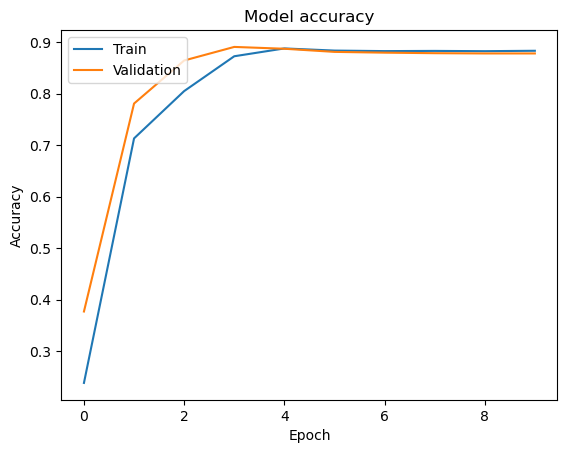

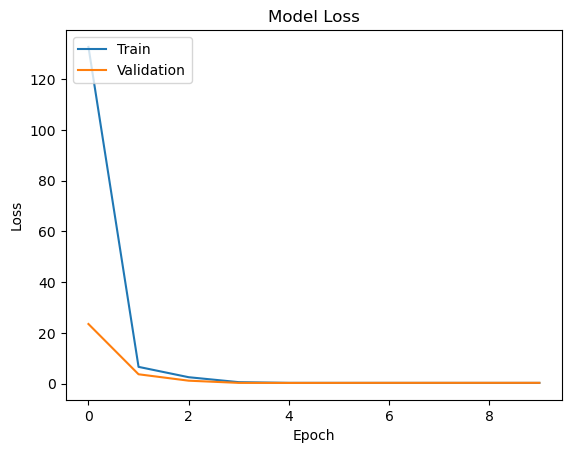

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test['Revenue'])
print(f'The loss on the test set is {test_loss:.4f} and the accuracy is {test_acc*100:.3f}%')

78/78 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8637
The loss on the test set is 0.4185 and the accuracy is 86.375%
